In [78]:
#1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [2]:
# 2. Carga de los archivos a DataFrames de Pandas
dataset1 = pd.read_csv(r'D:\ML-PROYECTO02\ML-PROYECTO02\DATASET_RAW\hospitalizaciones_test.csv', sep = ',', encoding = 'utf_8')
dataset2 = pd.read_csv(r'D:\ML-PROYECTO02\ML-PROYECTO02\DATASET_RAW\hospitalizaciones_train.csv', sep = ',', encoding = 'utf_8')


In [3]:
# 3.
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [3]:
# 4.
dataset2.rename(columns={'Available Extra Rooms in Hospital':'Available_ex_rooms', 'Stay (in days)':'Stay', 'Type of Admission':'Type_admission', 'Severity of Illness':'Severity_illness', 'Visitors with Patient':'Visitors_with_patient'}, inplace=True)
#dataset1.rename(columns={'Available Extra Rooms in Hospital':'Available_ex_rooms', 'Type of Admission':'Type_admission', 'Severity of Illness':'Severity_illness', 'Visitors with Patient':'Visitors_with_patient'}, inplace=True)

In [4]:
# 5.
dataset1_test_EDA = ProfileReport(dataset1, title="Pandas Profiling Report")
dataset1_test_EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# 6.
dataset2_train_EDA = ProfileReport(dataset2, title="Pandas Profiling Report")
dataset2_train_EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# 7. Guardamos los reportes EDA en un directorio
dataset1_test_EDA.to_file("D:\ML-PROYECTO02\ML-PROYECTO02\EDA_REPORT\dataset_test_EDA.html")
dataset2_train_EDA.to_file("D:\ML-PROYECTO02\ML-PROYECTO02\EDA_REPORT\dataset_train_EDA.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
dataset2.head(5)

Available_ex_rooms  Department Ward_Facility_Code doctor_name  \
0                   4  gynecology                  D   Dr Sophia   
1                   4  gynecology                  B   Dr Sophia   
2                   2  gynecology                  B   Dr Sophia   
3                   4  gynecology                  D   Dr Olivia   
4                   2  anesthesia                  E     Dr Mark   

   staff_available  patientid    Age  gender Type_admission Severity_illness  \
0                0      33070  41-50  Female         Trauma          Extreme   
1                2      34808  31-40  Female         Trauma            Minor   
2                8      44577  21-30  Female         Trauma          Extreme   
3                7       3695  31-40  Female         Urgent         Moderate   
4               10     108956  71-80    Male         Trauma         Moderate   

  health_conditions  Visitors_with_patient Insurance  Admission_Deposit  Stay  
0          Diabetes                      4       Yes        2966.408696     8  
1     Heart disease                      2        No        3554.835677     9  
2          Diabetes                      2       Yes        5624.733654     7  
3              None                      4        No        4814.149231     8  
4          Diabetes                      2        No        5169.269637    34

### APLICACION DE MODELO - SOBRE UN DATASET COPY

In [4]:
# 8.
train_dataset2 = dataset2.copy() # Realizamos una copia al Dataframe importado originalmente

In [ ]:
train_dataset2.isna().sum() # Muestra los valores faltantes del DataFrame

In [ ]:
train_dataset2.info()

In [127]:
train_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Department         410000 non-null  object
 1   doctor_name        410000 non-null  object
 2   Age                410000 non-null  object
 3   gender             410000 non-null  object
 4   Type_admission     410000 non-null  object
 5   Severity_illness   410000 non-null  object
 6   health_conditions  410000 non-null  object
 7   Insurance          410000 non-null  object
 8   Stay_long          410000 non-null  int32 
dtypes: int32(1), object(8)
memory usage: 26.6+ MB


In [5]:
# 9. Descarto las columnas que tienen una correlacion baja
descartadas = ['Available_ex_rooms','Ward_Facility_Code','Admission_Deposit','Visitors_with_patient','staff_available', 'patientid', 'Available_ex_rooms']
train_dataset2 = train_dataset2.drop(columns=descartadas)
train_dataset2.head(3)

Department doctor_name    Age  gender Type_admission Severity_illness  \
0  gynecology   Dr Sophia  41-50  Female         Trauma          Extreme   
1  gynecology   Dr Sophia  31-40  Female         Trauma            Minor   
2  gynecology   Dr Sophia  21-30  Female         Trauma          Extreme   

  health_conditions Insurance  Stay  
0          Diabetes       Yes     8  
1     Heart disease        No     9  
2          Diabetes       Yes     7

In [6]:
# 10. se Genera la columna Stay_long (Target) categorizando 0 y 1, cuando es mayor a 8 = 1, igual y menor = 0
train_dataset2['Stay2'] = train_dataset2['Stay'] > 8
train_dataset2['Stay_long'] = np.where(train_dataset2['Stay2'], '1', '0')

In [7]:
train_dataset2.head(3)

Department doctor_name    Age  gender Type_admission Severity_illness  \
0  gynecology   Dr Sophia  41-50  Female         Trauma          Extreme   
1  gynecology   Dr Sophia  31-40  Female         Trauma            Minor   
2  gynecology   Dr Sophia  21-30  Female         Trauma          Extreme   

  health_conditions Insurance  Stay  Stay2 Stay_long  
0          Diabetes       Yes     8  False         0  
1     Heart disease        No     9   True         1  
2          Diabetes       Yes     7  False         0

In [8]:
#11. Se elimina la columna Stay2, no es necesaria
train_dataset2.drop(columns=["Stay2"], inplace = True)
train_dataset2.drop(columns=["Stay"], inplace = True)

In [9]:
#12. Se convierte la columna Stay_long a tipo entero
train_dataset2['Stay_long'] = train_dataset2['Stay_long'].astype(int)

In [10]:
#13
train_dataset2['Stay_long'].value_counts()

1    255416
0    154584
Name: Stay_long, dtype: int64

In [11]:
#14. 
train_dataset2.head(3)

Department doctor_name    Age  gender Type_admission Severity_illness  \
0  gynecology   Dr Sophia  41-50  Female         Trauma          Extreme   
1  gynecology   Dr Sophia  31-40  Female         Trauma            Minor   
2  gynecology   Dr Sophia  21-30  Female         Trauma          Extreme   

  health_conditions Insurance  Stay_long  
0          Diabetes       Yes          0  
1     Heart disease        No          1  
2          Diabetes       Yes          0

### RETRAIN_MODEL - DATASET UTILIZADO CON LAS COLUMNAS CON MAYOR CORRELACION

In [12]:
#15.
retrain_model = pd.get_dummies(train_dataset2, columns=["Department","doctor_name","Age","gender","Type_admission","Severity_illness","health_conditions","Insurance"])
#retrain_model = pd.get_dummies(train_dataset2, columns=["Department","Ward_Facility_Code","doctor_name","gender","Type_admission","Severity_illness","health_conditions","Insurance"])

In [15]:
#16.
retrain_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   Stay_long                              410000 non-null  int32
 1   Department_TB & Chest disease          410000 non-null  uint8
 2   Department_anesthesia                  410000 non-null  uint8
 3   Department_gynecology                  410000 non-null  uint8
 4   Department_radiotherapy                410000 non-null  uint8
 5   Department_surgery                     410000 non-null  uint8
 6   doctor_name_Dr Isaac                   410000 non-null  uint8
 7   doctor_name_Dr John                    410000 non-null  uint8
 8   doctor_name_Dr Mark                    410000 non-null  uint8
 9   doctor_name_Dr Nathan                  410000 non-null  uint8
 10  doctor_name_Dr Olivia                  410000 non-null  uint8
 11  doctor_name_D

In [21]:
#17.
retrain_model.corr()['Stay_long'].sort_values(ascending=False)

Stay_long                                1.000000
Stay                                     0.493378
doctor_name_Dr Mark                      0.246904
Department_anesthesia                    0.242282
gender_Male                              0.184325
Age_61-70                                0.184272
Age_51-60                                0.165409
Department_TB & Chest disease            0.154842
Age_71-80                                0.153605
Age_81-90                                0.100105
doctor_name_Dr John                      0.099091
Department_surgery                       0.078740
gender_Other                             0.072283
doctor_name_Dr Isaac                     0.066519
Age_0-10                                 0.063964
doctor_name_Dr Simon                     0.041826
Age_91-100                               0.041025
Severity_illness_Moderate                0.029866
Type_admission_Trauma                    0.015249
health_conditions_High Blood Pressure    0.006233


In [167]:
sns.pairplot(retrain_model,hue="Stay_long")

### MODELO ARBOL DE DECISION PRUEBAS

In [25]:
# 18
X = retrain_model[['doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes' ]]
y = retrain_model['Stay_long']

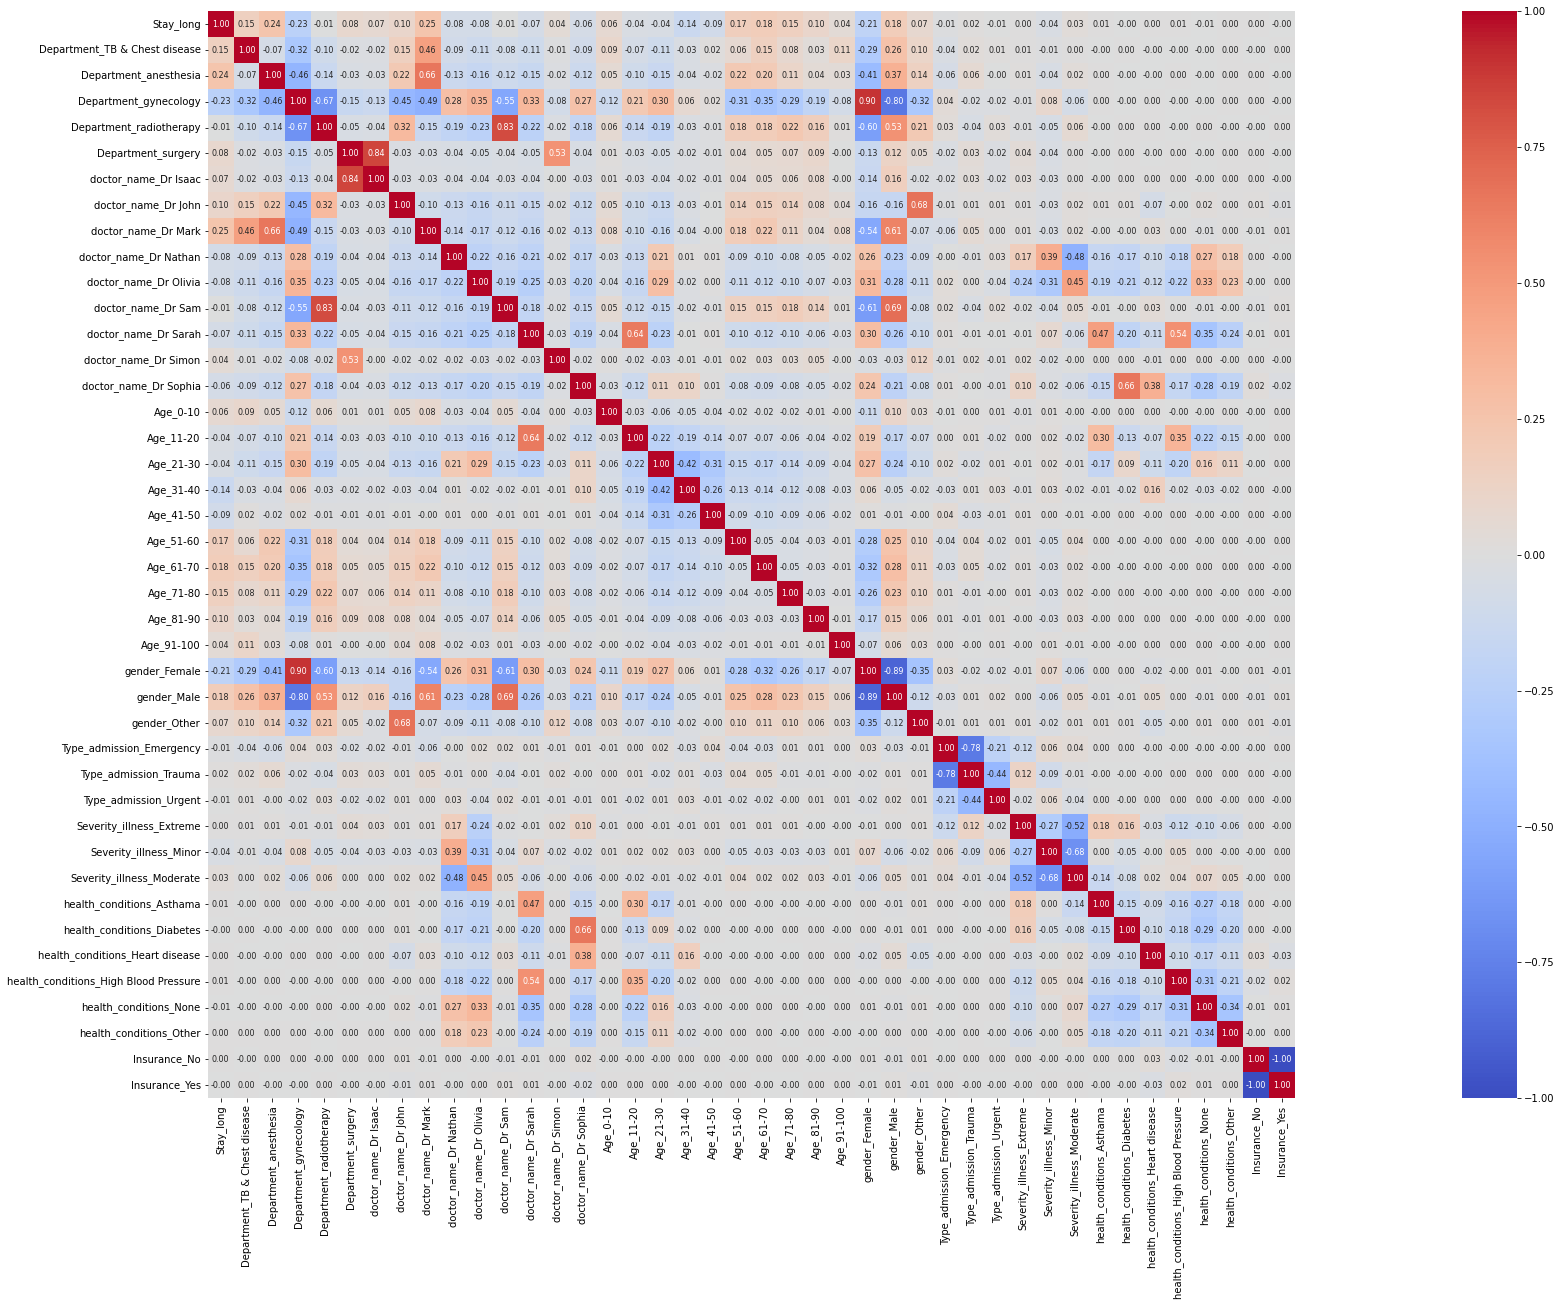

In [113]:
# 19 Realizamos el mapa de calor para ver la correlación entre las variables

corr = retrain_model.corr()
plt.figure(figsize=(60,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= retrain_model.columns, 
           yticklabels= retrain_model.columns,
           cmap= 'coolwarm')
plt.show()

### APLICAMOS ML-ARBOL DE DECISION CON LAS FEATURES  

In [26]:
# 20 Prueba 3, Resultado 0.6627967479674797
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    retrain_model[[ 'doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes'
                     
    ]],
    retrain_model["Stay_long"], 
    test_size=0.30)

### ARBOL DE DECISION

El accuracy del modelo es:  0.6603902439024391
|--- Department_anesthesia <= 0.50
|   |--- Age_61-70 <= 0.50
|   |   |--- Age_71-80 <= 0.50
|   |   |   |--- Age_51-60 <= 0.50
|   |   |   |   |--- Department_TB & Chest disease <= 0.50
|   |   |   |   |   |--- Age_81-90 <= 0.50
|   |   |   |   |   |   |--- Department_radiotherapy <= 0.50
|   |   |   |   |   |   |   |--- Department_gynecology <= 0.50
|   |   |   |   |   |   |   |   |--- Type_admission_Trauma <= 0.50
|   |   |   |   |   |   |   |   |   |--- gender_Male <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Severity_illness_Moderate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Severity_illness_Moderate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- gender_Male >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Type_admission_Trauma >  0

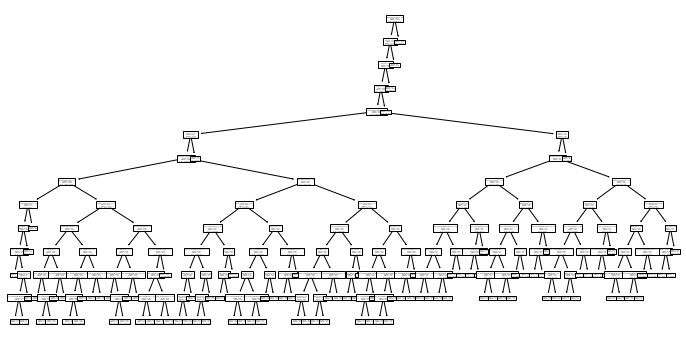

In [27]:
# 21
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)

arbol = arbol_decision.fit(X_train, y_train)

accuracy = arbol_decision.score(X_test, y_test)

print("El accuracy del modelo es: ", accuracy)

print(tree.export_text(arbol,
                      feature_names=[ 'doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes']))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=[ 'doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes'])
plt.show()

In [25]:
# 22. Exploramos algunas de las características del modelo entrenado. Para pensar, 
# ¿qúe representa cada uno de estos valores?

print(arbol_decision.classes_)
print(arbol_decision.n_classes_)
print(arbol_decision.max_features_)
print(arbol_decision.feature_importances_)

[0 1]
2
23
[1.23992647e-01 1.50443289e-01 1.25893461e-01 6.04576720e-02
 7.26275860e-03 5.77804122e-02 0.00000000e+00 0.00000000e+00
 1.20077914e-03 2.84719675e-04 4.51956114e-05 1.84681506e-03
 0.00000000e+00 3.70348084e-05 8.57163621e-05 7.54715650e-05
 4.71369312e-05 0.00000000e+00 1.22022515e-02 0.00000000e+00
 3.41496014e-01 8.37851833e-02 3.30634425e-02]


In [118]:
#23. Entrenamos el modelo

arbol_decision.fit(X.values,y.values)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [119]:
#24. Predecimos

y_pred = arbol_decision.predict(X.values)

In [135]:
# Se genera un nuevo dataset con la columna predicha
prediccion = pd.DataFrame(y_pred,columns=["pred"])
prediccion

pred
0          1
1          1
2          1
3          1
4          1
...      ...
409995     1
409996     1
409997     1
409998     1
409999     1

[410000 rows x 1 columns]

In [136]:
# Conteo de los valores resultantes
prediccion.value_counts()

pred
1       372775
0        37225
dtype: int64

In [142]:
# Se guarda el resultado en en archivo .CSV
prediccion.to_csv(r"D:\ML-PROYECTO02\ML-PROYECTO02\Test\fhaad_tree.csv",index=False)

In [120]:
#25 **Con este metodo de evaluacion** sabremos la precision o exactitud de la prediccion
from sklearn.metrics import accuracy_score # Utilizamos accuracy_score

print(accuracy_score(y,y_pred))

0.661480487804878


In [121]:
#26. ** Con este metodo de un reporte de clasificacion se observa y se analiza los resultados
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.17      0.28    154584
           1       0.66      0.96      0.78    255416

    accuracy                           0.66    410000
   macro avg       0.68      0.56      0.53    410000
weighted avg       0.68      0.66      0.59    410000



### PRUEBA 1 - SVM (SUPPORT VECTOR MACHINE)

In [123]:
# PRUEBA 1
#X = retrain_model.iloc[:, [2, 40]].values
#Y = retrain_model.iloc[:, 1].values

X = retrain_model[['doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes' ]]
Y = retrain_model['Stay_long']

In [124]:
from sklearn.model_selection import train_test_split # Importamos train_test_split clase de entrenamiento y testeo

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [125]:
# Estandarizamos (obviar esta parte por el momento, simplemente ejecutar)

from sklearn.preprocessing import StandardScaler # Importamos la clase StandarsScaler para estandarizar un conjunto de datos
                                                 # es un requisito común para muchos estimadores de aprendizaje automático

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [126]:
# Entrenamos el Modelo
from sklearn.svm import SVC  # Clase de entrenamientos 

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [128]:
# Predecimos

Y_Pred = classifier.predict(X_Test)

In [ ]:
#25 **Con este metodo de evaluacion** sabremos la precision o exactitud de la prediccion
from sklearn.metrics import accuracy_score # Utilizamos accuracy_score

print(accuracy_score(Y,Y_Pred))

In [139]:
prediccion1 = pd.DataFrame(Y_Pred,columns=["pred"])
prediccion1

pred
0          1
1          0
2          1
3          1
4          1
...      ...
102495     1
102496     1
102497     1
102498     1
102499     1

[102500 rows x 1 columns]

In [140]:
prediccion1.value_counts()

pred
1       93392
0        9108
dtype: int64

In [141]:
prediccion1.to_csv(r"D:\ML-PROYECTO02\ML-PROYECTO02\Test\fhaad_SVM.csv",index=False)

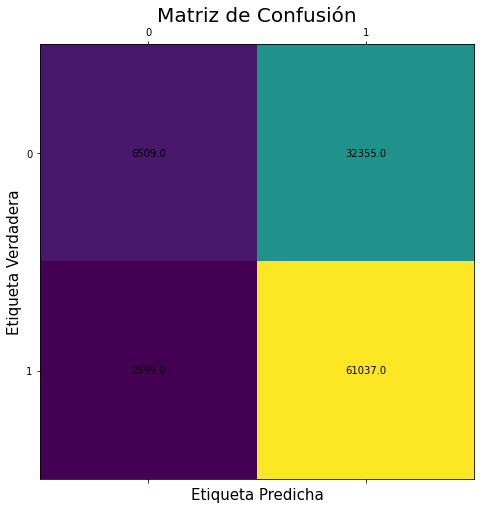

In [129]:
##** EVALUAMOS **

# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [130]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.71      0.17      0.27     38864
           1       0.65      0.96      0.78     63636

    accuracy                           0.66    102500
   macro avg       0.68      0.56      0.52    102500
weighted avg       0.68      0.66      0.59    102500



### TESTEO FINAL PARA GUARDAR DATOS

### ULTIMA PRUEBA

In [28]:
X = retrain_model[['gender_Male','gender_Female','Department_anesthesia','Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery',
                    'Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes' ]]
Y = retrain_model['Stay_long']

In [29]:
# Realizamos un escalado de los datos. Esto se debe a que K-NN trabaja con distancias y no puede discernir la diferencia de escala y unidades entre cada una de las variables.

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [30]:
Y.sum()/Y.count()

0.6229658536585366

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=60, stratify=Y)

In [33]:
print('Proporción de etiquetas en set de entrenamiento:', Y_train.sum()/Y_train.count())
print('Proporción de etiquetas en set de testeo:', Y_test.sum()/Y_test.count())

Proporción de etiquetas en set de entrenamiento: 0.6229647696476964
Proporción de etiquetas en set de testeo: 0.6229756097560976


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


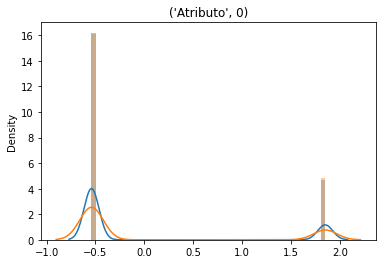

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


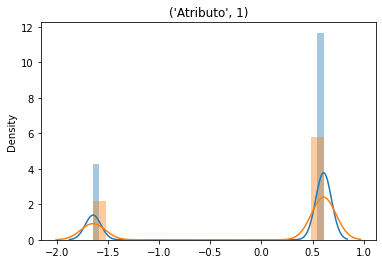

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


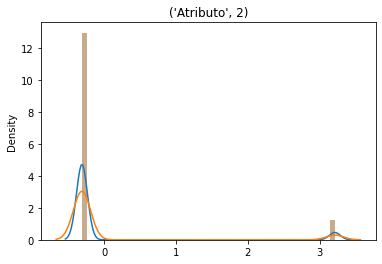

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


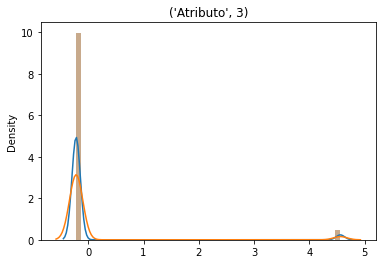

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


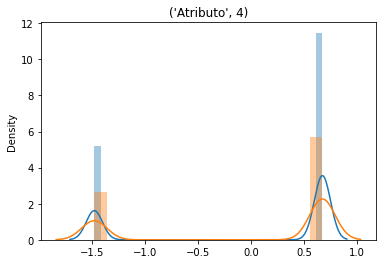

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


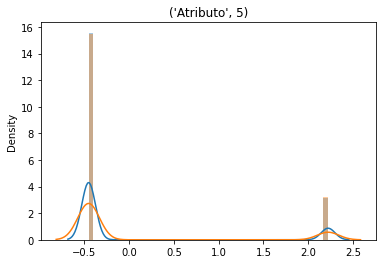

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


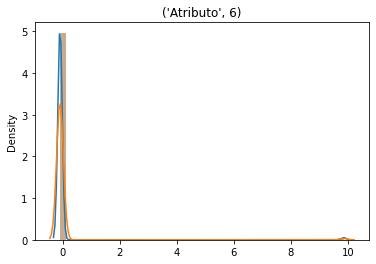

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


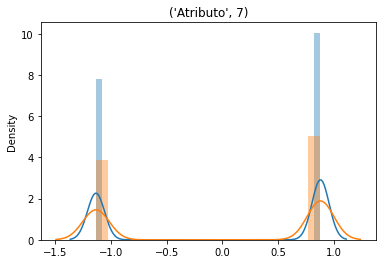

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


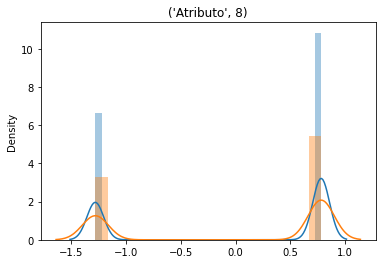

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


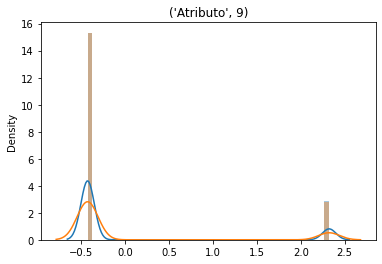

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_train[:,i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15072\1481765282.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = X_test[:,i])


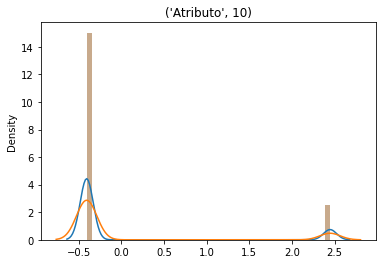

In [34]:
# Chequeamos la distribución de los subsets

for i in range(X_train.shape[1]):
    sns.distplot(x = X_train[:,i])
    sns.distplot(x = X_test[:,i])
    titulo = 'Atributo', i
    plt.title(titulo)
    plt.show()

In [35]:
print('Proporción de etiquetas positiva en los datos de Train: ', Y_train.sum()/Y_train.size)
print('Proporción de etiquetas positiva en los datos de Test: ', Y_test.sum()/Y_test.size)

Proporción de etiquetas positiva en los datos de Train:  0.6229647696476964
Proporción de etiquetas positiva en los datos de Test:  0.6229756097560976


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Instanciamos el árbol

tree = DecisionTreeClassifier(max_depth = None)
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
# Predecimos sobre nuestro set de entrenamiento

Y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test

Y_test_pred = tree.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(Y_train_pred,Y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(Y_test_pred,Y_test))

Accuracy sobre conjunto de Train: 0.6229647696476964
Accuracy sobre conjunto de Test: 0.6229756097560976


In [44]:
# Instanciamos un modelo de vecinos más cercanos

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
# Predecimos sobre nuestro set de entrenamiento

Y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test

Y_test_pred = knn.predict(X_test)

# Comparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(Y_train_pred,Y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(Y_test_pred,Y_test))

Accuracy sobre conjunto de Train: 0.6037208672086721
Accuracy sobre conjunto de Test: 0.6064146341463414


In [46]:
# Importamos cross_val_score 

from sklearn.model_selection import cross_val_score

In [47]:
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X, Y, cv=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X, Y, cv=5)

In [48]:
print(tree_scores)
print(knn_scores)

[0.62296341 0.62296341 0.62296341 0.62296341 0.62297561]
[0.62095122 0.56932927 0.58335366 0.57820732 0.58113415]


In [49]:
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy para Tree: 0.62 (+/- 0.00)
Accuracy para KNN: 0.59 (+/- 0.04)


### RANDOM FOREST

In [17]:
# Valores no nulos

train_dataset2.head(2)

Department doctor_name    Age  gender Type_admission Severity_illness  \
0  gynecology   Dr Sophia  41-50  Female         Trauma          Extreme   
1  gynecology   Dr Sophia  31-40  Female         Trauma            Minor   

  health_conditions Insurance  Stay_long  
0          Diabetes       Yes          0  
1     Heart disease        No          1

In [ ]:
# Valores no nulos

train_dataset2.count().sort_values()

In [15]:
retrain_model = pd.get_dummies(train_dataset2, columns=["Department","doctor_name","Age","gender","Type_admission","Severity_illness",
                                                        "health_conditions","Insurance"])

In [ ]:
retrain_model

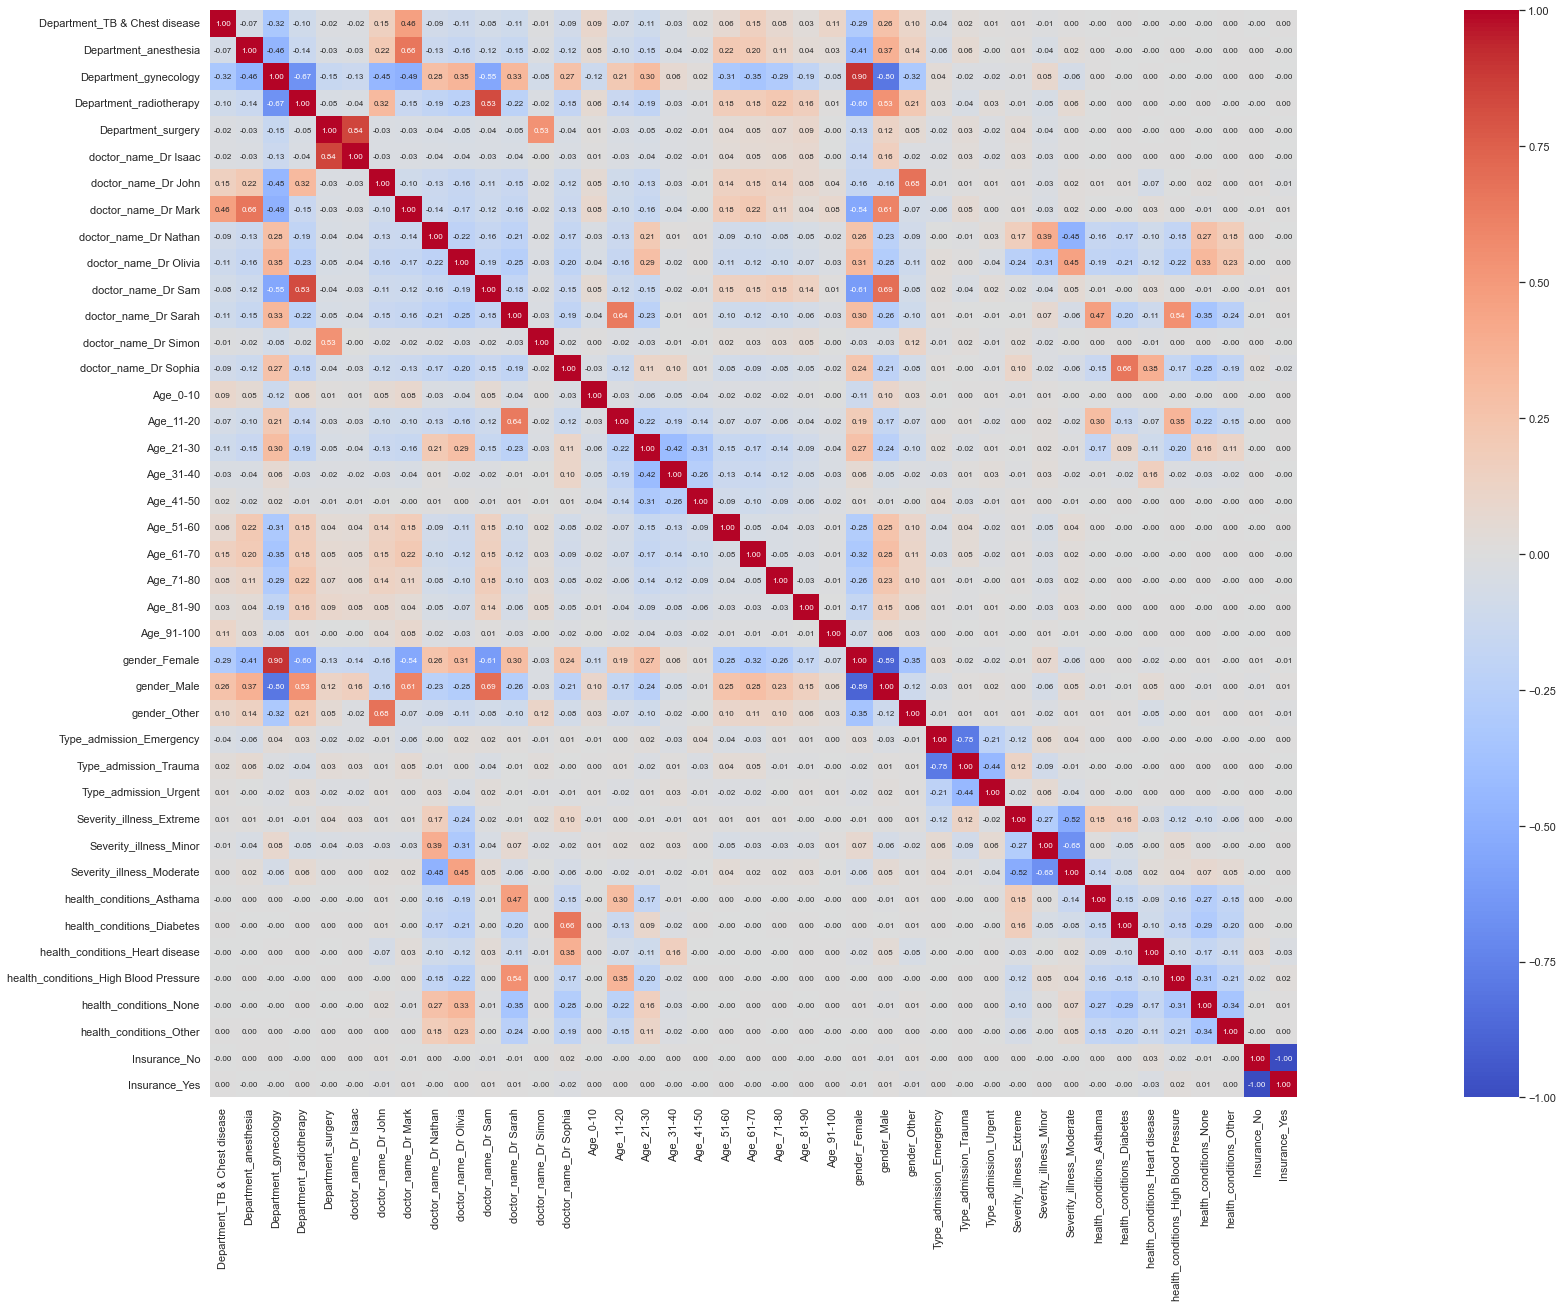

In [24]:
# Hacemos un mapa de calor

corr = retrain_model.drop(columns = ['Stay_long']).corr(method='pearson')
plt.figure(figsize=(60,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9},
           xticklabels= retrain_model.drop(columns = ['Stay_long']).columns, 
           yticklabels= retrain_model.drop(columns = ['Stay_long']).columns,
           cmap= 'coolwarm')

plt.show()

In [ ]:
# En base a la información obtenida, podríamos descartar algunas columnas redundantes

data = data.drop(columns=['Temp3pm', 'Pressure9am'])

In [27]:
retrain_model.corr()['Stay_long'].sort_values(ascending=False)

Stay_long                                1.000000
doctor_name_Dr Mark                      0.246904
Department_anesthesia                    0.242282
gender_Male                              0.184325
Age_61-70                                0.184272
Age_51-60                                0.165409
Department_TB & Chest disease            0.154842
Age_71-80                                0.153605
Age_81-90                                0.100105
doctor_name_Dr John                      0.099091
Department_surgery                       0.078740
gender_Other                             0.072283
doctor_name_Dr Isaac                     0.066519
Age_0-10                                 0.063964
doctor_name_Dr Simon                     0.041826
Age_91-100                               0.041025
Severity_illness_Moderate                0.029866
Type_admission_Trauma                    0.015249
health_conditions_High Blood Pressure    0.006233
health_conditions_Asthama                0.005211


In [65]:
X = retrain_model[['doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_51-60','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes','Insurance_No', 'Insurance_Yes' ]]
y = retrain_model['Stay_long']

In [66]:
# Elegimos variables de entrenamiento (empezamos con dos) y separamos las etiquetas

columnas_entrenamiento = ['doctor_name_Dr Mark','doctor_name_Dr Sophia','doctor_name_Dr Sarah','doctor_name_Dr Isaac','gender_Male','gender_Female','Department_anesthesia','Department_gynecology','Age_51-60','Age_61-70','Age_51-60','Age_71-80','Age_81-90',
    'Department_TB & Chest disease','Department_gynecology','Department_radiotherapy','Department_surgery','Severity_illness_Moderate','Type_admission_Trauma','health_conditions_High Blood Pressure','health_conditions_Diabetes','Insurance_No', 'Insurance_Yes']
X = retrain_model[columnas_entrenamiento]
# X = data.drop(columns = 'RainTomorrow')
y = retrain_model.Stay_long

In [67]:
# Generamos un modelo que diga siempre que NO va a llover y medimos su exactitud

y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
print(accuracy_ceros)

0.3770341463414634


In [68]:
# Generamos otro modelo que diga siempre que SÍ va a llover y medimos su exactitud

y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
print(accuracy_unos)

0.6229658536585366


In [69]:
# Separamos nuestros datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [70]:
lista_de_modelos = []
N_modelos = 10

In [71]:
for i in range(N_modelos):
    X_train_boostrap, _, y_train_boostrap, _ = train_test_split(X_train, y_train, test_size=0.5, stratify = y_train)
    clf = DecisionTreeClassifier(max_depth = None) # Lo dejamos sobreajustar
    clf.fit(X_train_boostrap, y_train_boostrap)
    lista_de_modelos.append(clf)

In [72]:
# Evaluamos cada modelo en hold-out

for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    print('Accuracy Modelo ', idx, ' es ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Modelo  0  es  0.6610325203252032
Accuracy Modelo  1  es  0.6608861788617886
Accuracy Modelo  2  es  0.6607886178861788
Accuracy Modelo  3  es  0.6609756097560976
Accuracy Modelo  4  es  0.6609512195121952
Accuracy Modelo  5  es  0.6610487804878049
Accuracy Modelo  6  es  0.6610569105691056
Accuracy Modelo  7  es  0.6610325203252032
Accuracy Modelo  8  es  0.6610081300813008
Accuracy Modelo  9  es  0.6609674796747967


In [73]:
probs_test_pred = np.zeros(y_test.size)

In [74]:
# Recorremos la lista y predecimos las probabilidades

for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test)
    #print(probs_test_pred_modelo.shape)
    probs_test_pred += probs_test_pred_modelo[:,1]

In [75]:
probs_test_pred = probs_test_pred/N_modelos

In [76]:
y_test_pred = probs_test_pred>0.5
y_test_pred = y_test_pred.astype(int)

In [77]:
print('Accuracy del ensamble: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy del ensamble:  0.6610569105691056


BAGGIN CLASSIFIER

In [79]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.6616620209059233
0.6610569105691056


In [80]:
#26. ** Con este metodo de un reporte de clasificacion se observa y se analiza los resultados
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.17      0.28     46375
           1       0.66      0.96      0.78     76625

    accuracy                           0.66    123000
   macro avg       0.68      0.56      0.53    123000
weighted avg       0.68      0.66      0.59    123000



In [81]:
# Se genera un nuevo dataset con la columna predicha
prediccion2 = pd.DataFrame(y_test_pred,columns=["pred"])
prediccion2

pred
0          1
1          1
2          1
3          1
4          1
...      ...
122995     1
122996     1
122997     1
122998     1
122999     1

[123000 rows x 1 columns]

In [82]:
# Conteo de los valores resultantes
prediccion2.value_counts()

pred
1       111801
0        11199
dtype: int64

In [83]:
prediccion2.to_csv(r"D:\ML-PROYECTO02\ML-PROYECTO02\Test\fhaad_Rforest.csv",index=False)